# Optimisation de portefeuille

Ce notebook applique différentes méthodes d’optimisation de portefeuille :
- Minimisation de la variance
- Maximisation du ratio de Sharpe
- Optimisation sous contrainte de rendement cible
- Objectif personnalisé

Les données utilisées sont les rendements historiques de plusieurs actifs cotés


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")
from src.data_loader import get_data_adj
from src.portfolio_optimization import (
    mean_variance_optimization,
    max_sharpe_portfolio,
    min_variance_portfolio,
    custom_objective_portfolio
)

# Paramètres
tickers = ["AAPL", "MSFT", "TSLA", "GOOGL", "DIS"]
start_date = "2023-08-01"
end_date = "2024-07-31"

# Chargement des prix ajustés
prices = get_data_adj(tickers, start=start_date, end=end_date)

# Calcul des rendements journaliers
returns = np.log(prices / prices.shift(1)).dropna()


[*********************100%***********************]  5 of 5 completed


# Statistiques descriptives

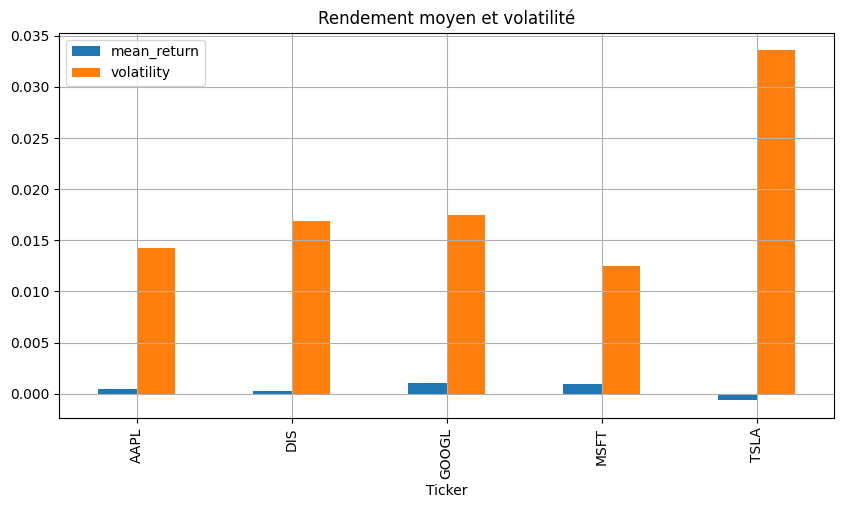

In [11]:
# Statistiques de base
stats = returns.describe().T
stats["mean_return"] = returns.mean()
stats["volatility"] = returns.std()
stats[["mean_return", "volatility"]].plot(kind="bar", figsize=(10, 5), title="Rendement moyen et volatilité")
plt.grid()
plt.show()


# Matrice de covariance et rendements attendus

In [12]:
expected_returns = returns.mean().values
cov_matrix = returns.cov().values

print("Rendements attendus :")
print(expected_returns)

print("\nMatrice de covariance :")
print(pd.DataFrame(cov_matrix, index=tickers, columns=tickers).round(4))


Rendements attendus :
[ 0.00046933  0.00023977  0.00103705  0.00094741 -0.00063729]

Matrice de covariance :
         AAPL    MSFT    TSLA   GOOGL     DIS
AAPL   0.0002  0.0000  0.0001  0.0001  0.0002
MSFT   0.0000  0.0003  0.0000  0.0000  0.0001
TSLA   0.0001  0.0000  0.0003  0.0001  0.0001
GOOGL  0.0001  0.0000  0.0001  0.0002  0.0001
DIS    0.0002  0.0001  0.0001  0.0001  0.0011


# OPTIMISATION : Volatilité Minimale

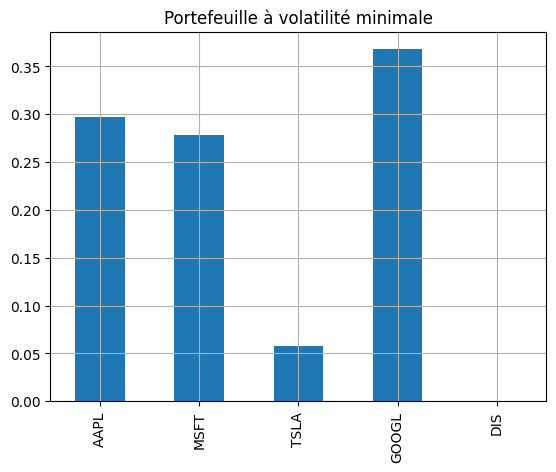

In [13]:
weights_min_var = min_variance_portfolio(cov_matrix)
pd.Series(weights_min_var, index=tickers, name="Poids min variance").plot(kind="bar", title="Portefeuille à volatilité minimale")
plt.grid()
plt.show()


# OPTIMISATION : Ratio Sharp Maximal

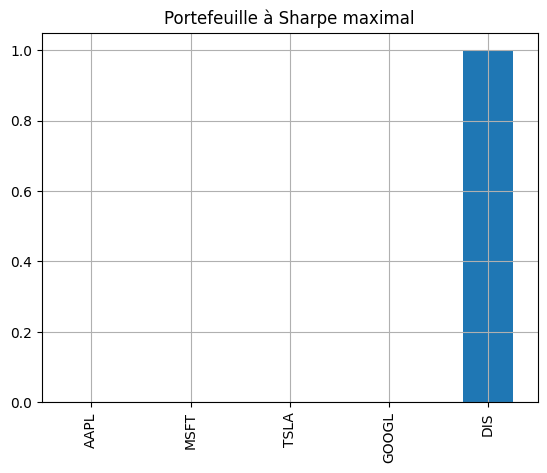

In [14]:
weights_sharpe = max_sharpe_portfolio(expected_returns, cov_matrix, risk_free_rate=0.02)
pd.Series(weights_sharpe, index=tickers, name="Poids max Sharpe").plot(kind="bar", title="Portefeuille à Sharpe maximal")
plt.grid()
plt.show()


# OPTIMISATION: Rendement Cible

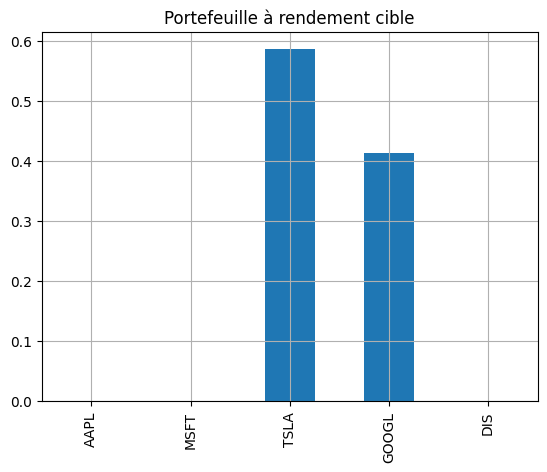

In [15]:
target_return = 0.001  # Rendement journalier cible (~25% annuel)
weights_target = mean_variance_optimization(expected_returns, cov_matrix, target_return)
pd.Series(weights_target, index=tickers, name="Poids rendement cible").plot(kind="bar", title="Portefeuille à rendement cible")
plt.grid()
plt.show()


# OPTIMISATION : Objectif Personnalisé (ici maximiser le rendement)

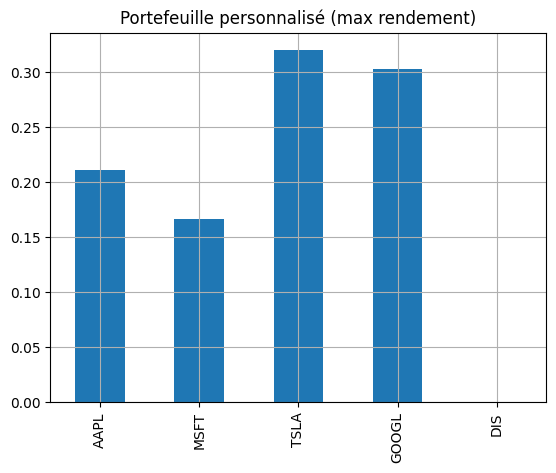

In [16]:
objective_fn = lambda w: -w @ expected_returns
weights_custom = custom_objective_portfolio(objective_fn, expected_returns, cov_matrix)
pd.Series(weights_custom, index=tickers, name="Poids objectif perso").plot(kind="bar", title="Portefeuille personnalisé (max rendement)")
plt.grid()
plt.show()
